<img src="img/NumPy_logo.svg" width="400px">

## ¿Qué es NumPy?

* Una biblioteca para Python: `ndarray` + `ufunc`
* Los arrays multidimensionales (`ndarray`) nos permiten almacenar datos de manera estructurada
* Las funciones universales (`ufunc`) nos permiten operar con esos datos de manera eficiente

Python está organizado en módulos, que son archivos con extensión `.py` que contienen funciones, variables y otros objetos, y paquetes, que son conjuntos de módulos. Cuando queremos utilizar objetos que están definidos en un módulo tenemos que *importarlo*, y una vez que lo hemos hecho podemos usar el operador `.` para ir descendiendo en la jerarquía de paquetes y acceder al objeto que necesitamos. Por ejemplo, de esta manera importamos NumPy:

In [1]:
import numpy

Y de esta manera accedemos a la función `norm`, que calcula la norma (o módulo) de un array:

In [2]:
numpy.linalg.norm

<function numpy.linalg.linalg.norm>

La función `norm` está dentro del paquete `linalg`, que a su vez está dentro del paquete NumPy.

La convención para importar NumPy siempre es esta:

In [1]:
import numpy as np

Lo que hacemos es crear un *alias* al paquete NumPy de nombre `np`. Es simplemente una forma de abreviar el código. Esta forma de separar las funciones en paquetes (que se llaman **espacios de nombres** o *namespaces*) conduce a una mayor legibilidad del código y a la supresión de ambigüedades.

In [2]:
np.mi*?

np.min
np.min_scalar_type
np.minimum
np.mintypecode
np.mirr

In [4]:
np.sin?

Call signature:  np.sin(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'sin'>
File:            c:\python37-32\lib\site-packages\numpy\__init__.py
Docstring:      
sin(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Trigonometric sine, element-wise.

Parameters
----------
x : array_like
    Angle, in radians (:math:`2 \pi` rad equals 360 degrees).
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or `None`,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    Values of True indicate to calculate the ufunc at that position, values
    of False indicate to leave the value in the output alone.
**kwargs
    For other keyword-only arguments, see the
    :r

## ¿Qué es exactamente un array?

Un array de NumPy es una colección de `N` elementos, igual que una secuencia de Python (por ejemplo, una lista). Tiene las mismas propiedades que una secuencia y alguna más. Para crear un array, la forma más directa es pasarle una secuencia a la función `np.array`.

Un array es un __bloque de memoria que contiene elementos del mismo tipo__. Básicamente:

* nos _recuerdan_ a los vectores, matrices, tensores...
* podemos almacenar el array con un nombre y acceder a sus __elementos__ mediante sus __índices__.
* ayudan a gestionar de manera eficiente la memoria y a acelerar los cálculos.


---

| Índice     | 0     | 1     | 2     | 3     | ...   | n-1   | n  |
| ---------- | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| Valor      | 2.1   | 3.6   | 7.8   | 1.5   | ...   | 5.4   | 6.3 |

---

__¿Qué solemos guardar en arrays?__

* Vectores y matrices.
* Datos de experimentos:
    - En distintos instantes discretos.
    - En distintos puntos del espacio.
* Resultado de evaluar funciones con los datos anteriores.
* Discretizaciones para usar algoritmos de: integración, derivación, interpolación...
* ... 

In [5]:
np.array([1, 2, 3])

array([1, 2, 3])

Los arrays de NumPy son *homogéneos*, es decir, todos sus elementos son del mismo tipo. Si le pasamos a `np.array` una secuencia con objetos de tipos diferentes, promocionará todos al tipo con más información. Para acceder al tipo del array, podemos usar el atributo `dtype`.

In [11]:
a = np.array([1, 2, 3.0], dtype=float)
print(a.dtype)

float64


In [12]:
np.array([1, 2, "3"])

array(['1', '2', '3'], dtype='<U11')

<div class="alert alert-warning">**Nota**: Si NumPy no entiende el tipo de datos o construimos un array con argumentos incorrectos devolverá un array con `dtype` `object`. Estos arrays rara vez son útiles y su aparición suele ser signo de que algo falla en nuestro programa.</div>

NumPy intentará automáticamente construir un array con el tipo adecuado teniendo en cuenta los datos de entrada, aunque nosotros podemos forzarlo.

In [13]:
np.array([1, 2, 3], dtype=float)

array([1., 2., 3.])

In [14]:
np.array([1, 2, 3])

array([1.+0.j, 2.+0.j, 3.+0.j])

También podemos convertir un array de un tipo a otro utilizando el método `.astype`.

In [15]:
a

array([1., 2., 3.])

In [16]:
a.astype(int)

array([1, 2, 3])

### Más ejemplos

¿No decíamos que Python era fácil? Pues __creemos nuestros primeros arrays__. Los arrays de una dimensión se crean pasándole una lista como argumento a la función `np.array`.

In [17]:
# Array de una dimensión
np.array([1, 2, 5, 3])

array([1, 2, 5, 3])

In [18]:
# Comprobar el tipo de datos que contiene
_.dtype

dtype('int32')

Para crear un array de dos dimensiones le pasaremos una _lista de listas_:

In [20]:
# Array de dos dimensiones
mi_segundo_array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
mi_segundo_array

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

<div class="alert alert-info">Podemos continuar en la siguiente línea usando `\`, pero no es necesario escribirlo dentro de paréntesis o corchetes</div>

Esto sería una buena manera de definirlo, de acuerdo con el [PEP 8 (indentation)](http://legacy.python.org/dev/peps/pep-0008/#indentation):

In [16]:
mi_segundo_array = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
    ]) 

### Ejemplo con gráfico


In [21]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 2.5, 2.5

a = np.array([3., 6., 8., 7., 9., 4., 1., 6., 4., 4., 8.])
a


array([3., 6., 8., 7., 9., 4., 1., 6., 4., 4., 8.])

Los arreglos tienen algunas características. 

Una dimensión

In [22]:
a.ndim

1

Una forma

In [5]:
a.shape

(11,)

y de seguro un tipo de dato.

In [23]:
a.dtype

dtype('float64')

Ejemplo de matriz

In [24]:
smile = np.array([[0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 1, 1, 5, 1, 1, 5, 1, 1, 0],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 5, 1, 1, 1, 1, 5, 1, 1],
                  [0, 1, 1, 5, 1, 1, 5, 1, 1, 0],
                  [0, 0, 1, 1, 5, 5, 1, 1, 0, 0],
                  [0, 0, 0, 1, 1, 1, 1, 0, 0, 0]])


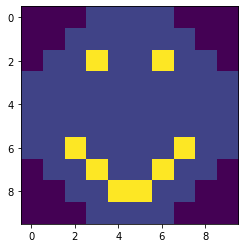

In [29]:
plt.imshow(smile)
plt.show()

Información de esta matriz

In [25]:
smile.ndim

2

In [26]:
smile.shape

(10, 10)

In [27]:
smile.dtype

dtype('int32')

Número de elementos

In [28]:
smile.size

100

## Constantes y funciones matemáticas

Además de arrays, NumPy contiene también constantes y funciones matemáticas de uso cotidiano.

In [5]:
np.e

2.718281828459045

In [6]:
np.pi

3.141592653589793

In [7]:
np.log(2)

0.69314718055994529

In [30]:
# Suma
mi_primer_array = np.array([2, 3, 4, 5, 6])
np.sum(mi_primer_array)

20

In [10]:
# Máximo
np.max(mi_primer_array)

4

In [31]:
# Seno
np.sin(mi_segundo_array)

array([[ 0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ],
       [ 0.6569866 ,  0.98935825,  0.41211849]])

In [33]:
np.sum(np.sqrt(mi_segundo_array))

19.306000526035724

## Motivo: eficiencia

* Los bucles son costosos
* Eliminar bucles: **vectorizar** operaciones
* Los bucles se ejecutan en Python, las operaciones vectorizadas en C
* Las operaciones entre arrays de NumPy se realizan **elemento a elemento**

Ejemplo:

$$ a_{ij} = b_{ij} + c_{ij} $$

In [35]:
N, M = 100, 100
a = np.empty(10000).reshape(N, M)
b = np.random.rand(10000).reshape(N, M)
c = np.random.rand(10000).reshape(N, M)

In [36]:
%%timeit
for i in range(N):
    for j in range(M):
        a[i, j] = b[i, j] + c[i, j]

6.77 ms ± 330 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [38]:
%%timeit
a = b + c
a = b - c

13.8 µs ± 311 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


¡1000 veces más rápido! Se hace fundamental **vectorizar** las operaciones y aprovechar al máximo la velocidad de NumPy.

## Indexación de arrays

Una de las herramientas más importantes a la hora de trabajar con arrays es el indexado. Consiste en seleccionar elementos aislados o secciones de un array. Nosotros vamos a ver la indexación básica, pero existen técnicas de indexación avanzada que convierten los arrays en herramientas potentísimas.

Se puede acceder a los elementos de matriz de forma similar a las listas con la notación de corchete. 
Para matrices de dimensiones superiores necesitamos saber a qué índice accede una determinada dimensión o eje .

<img src="img/elsp_0105.png" width="700px">

In [39]:
a = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
a

array([[1, 2, 3],
       [4, 5, 6]])

Los índices se indican entre corchetes justo después del array. Recuerda que en Python la indexación empieza en 0. Si recuperamos el primer elemento de un array de dos dimensiones, obtenemos la primera fila.

In [41]:
a[1]

array([4, 5, 6])

En vez de usar `a[0][0]` para recuperar el primer elemento de la primera fila, podemos abreviar aún más la sintaxis:

In [43]:
a[0, 0]

1

No solo podemos recuperar un elemento aislado, sino también porciones del array, utilizando la sintaxis `[<inicio>:<final>:<salto>]`.

In [45]:
a[1, 1:3]

array([5, 6])

In [46]:
a[0,::2]

array([1, 3])

Esto también se puede utilizar para asignar nuevos valores.

In [49]:
smile[2,3] = 0
smile[2, 6] = 0


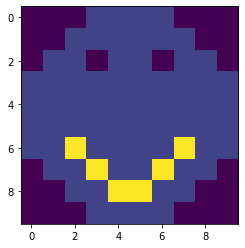

In [50]:
plt.imshow(smile)
plt.show()

Además de la segmentación de corte (de nuevo similar a las listas) es posible seleccionar más de un elemento. 
La sintaxis general es [start:stop:step].

Lo siguiente selecciona solo la parte de la sonrisa del smiley:

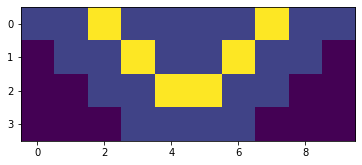

In [52]:
mouth = smile[6:,:]

plt.imshow(mouth)
plt.show()

También podemos combinar indexación y corte.

Las siguientes "vendas" nuestro smiley:

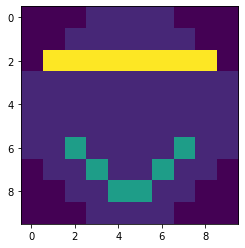

In [53]:
smile[2, 1:9] = 9
plt.imshow(smile)
plt.show()

## Creación de arrays

Muchos métodos y muy variados

* A partir de datos existentes: `array`, `copy`
* Unos y ceros: `empty`, `eye`, `ones`, `zeros`, `*_like`
* Rangos: `arange`, `linspace`, `logspace`, `meshgrid`
* Aleatorios: `rand`, `randn`

### Unos y ceros

* `empty(shape)` crea un array con «basura», equivalente a no inicializarlo, ligeramente más rápido que `zeros` o `ones`
* `eye(N, M=None, k=0)` crea un array con unos en una diagonal y ceros en el resto
* `identity(n)` devuelve la matriz identidad
* Las funciones `*_like(a)` construyen arrays con el mismo tamaño que uno dado

In [54]:
np.identity(5).astype(int)

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [55]:
_.shape

(5, 5)

Si la función recibe como argumento `shape`, debemos pasarle el número de filas y columnas como una tupla (es decir, encerrado entre paréntesis).

In [57]:
np.zeros((6, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

<div class="alert alert-warning">**Nota**: Un error muy típico es tratar de construir un array llamando a la función con dos argumentos, como se ejemplifica en la celda siguiente. Esto produce un error, porque NumPy espera un solo argumento: una tupla con el número de filas y el número de columnas. Es conveniente asegurarse de cuál es el convenio en cada caso porque no siempre hay consistencia interna.</div>

In [58]:
np.zeros(3, 4)

TypeError: data type not understood

In [59]:
np.ones((3, 4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [60]:
i3 = np.identity(3)
i3

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [61]:
i3.shape

(3, 3)

In [62]:
np.ones(i3.shape)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

Si en lugar de pasar directamente la forma del array ya sabemos que queremos crear un array con la misma forma que otro, podemos usar las funciones `*_like`, que reciben un array en vez de una tupla.

In [63]:
np.ones_like(i3)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

Cree una matriz con ceros en función de la forma y el tipo de otra matriz:

In [64]:
np.zeros_like(smile)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

### Rangos

* `linspace(start, stop, num=50)` devuelve números equiespaciados dentro de un intervalo
* `logspace(start, stop, num=50, base=10.0)` devuelve números equiespaciados según una escala logarítmica
* `meshgrid(x1, x2, ...)` devuelve matrices de n-coordenadas

#### np.arange

NumPy, dame __un array que vaya de 0 a 5__:

In [65]:
array = np.arange(10)
print(array)

[0 1 2 3 4 5 6 7 8 9]


__Mira con atención el resultado anterior__, ¿hay algo que deberías grabar en tu cabeza para simpre?
__El último elemento no es 5 sino 4__

NumPy, dame __un array que vaya de 0 a 10, de 3 en 3__:

In [66]:
np.arange(0,11,3)

array([0, 3, 6, 9])

#### np.linspace

Si has tenido que usar MATLAB alguna vez, seguro que esto te suena:

In [68]:
np.linspace(0, 10, 100)

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

En este caso sí que se incluye el último elemento.

In [32]:
np.linspace(0, 1, num=10)

array([ 0.        ,  0.11111111,  0.22222222,  0.33333333,  0.44444444,
        0.55555556,  0.66666667,  0.77777778,  0.88888889,  1.        ])

In [33]:
np.logspace(0, 3)

array([    1.        ,     1.1513954 ,     1.32571137,     1.52641797,
           1.75751062,     2.02358965,     2.32995181,     2.6826958 ,
           3.0888436 ,     3.55648031,     4.09491506,     4.71486636,
           5.42867544,     6.25055193,     7.19685673,     8.28642773,
           9.54095476,    10.98541142,    12.64855217,    14.56348478,
          16.76832937,    19.30697729,    22.22996483,    25.59547923,
          29.47051703,    33.93221772,    39.06939937,    44.98432669,
          51.79474679,    59.63623317,    68.6648845 ,    79.06043211,
          91.0298178 ,   104.81131342,   120.67926406,   138.94954944,
         159.98587196,   184.20699693,   212.09508879,   244.20530945,
         281.1768698 ,   323.74575428,   372.75937203,   429.19342601,
         494.17133613,   568.9866029 ,   655.12855686,   754.31200634,
         868.51137375,  1000.        ])

La función `np.meshgrid` se utiliza mucho a la hora de representar funciones en dos dimensiones, y crea dos arrays: uno varía por filas y otro por columnas. Combinándolos, podemos evaluar la función en un cuadrado.

In [70]:
x = np.linspace(0, 1, num=5)
print(x)
y = np.linspace(0, 1, num=5)
print(y)

xx, yy = np.meshgrid(x, y)

[0.   0.25 0.5  0.75 1.  ]
[0.   0.25 0.5  0.75 1.  ]


In [71]:
xx, yy

(array([[0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ]]),
 array([[0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.25, 0.25, 0.25, 0.25, 0.25],
        [0.5 , 0.5 , 0.5 , 0.5 , 0.5 ],
        [0.75, 0.75, 0.75, 0.75, 0.75],
        [1.  , 1.  , 1.  , 1.  , 1.  ]]))

In [72]:
xx + 1j * yy

array([[0.  +0.j  , 0.25+0.j  , 0.5 +0.j  , 0.75+0.j  , 1.  +0.j  ],
       [0.  +0.25j, 0.25+0.25j, 0.5 +0.25j, 0.75+0.25j, 1.  +0.25j],
       [0.  +0.5j , 0.25+0.5j , 0.5 +0.5j , 0.75+0.5j , 1.  +0.5j ],
       [0.  +0.75j, 0.25+0.75j, 0.5 +0.75j, 0.75+0.75j, 1.  +0.75j],
       [0.  +1.j  , 0.25+1.j  , 0.5 +1.j  , 0.75+1.j  , 1.  +1.j  ]])

### reshape

Con `np.arange()` es posible crear "vectores" cuyos elementos tomen valores consecutivos o equiespaciados, como hemos visto anteriormente. ¿Podemos hacer lo mismo con "matrices"? Pues sí, pero no usando una sola función. Imagina que quieres crear algo como esto:

\begin{pmatrix}
    1 & 2 & 3\\ 
    4 & 5 & 6\\
    7 & 8 & 9\\
    \end{pmatrix}
    
* Comenzaremos por crear un array 1d con los valores $(1,2,3,4,5,6,7,8,9)$ usando `np.arange()`.
* Luego le daremos forma de array 2d. con `np.reshape(array, (dim0, dim1))`.

In [78]:
a = np.arange(1,10).reshape(3, 3)
print(a)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [18]:
# También funciona como método
N = a.reshape([3,3])
N = a.reshape(3,3)
N

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

## Random 

Numpy también tiene muchas formas de crear matrices de números aleatorios:

### rand
Cree una matriz de la forma dada y rellénela con muestras aleatorias de una distribución uniforme sobre ``[0, 1)``.

In [47]:
np.random.rand(2)

array([ 0.11570539,  0.35279769])

In [79]:
np.random.rand(5,5)

array([[0.79425668, 0.67121295, 0.96553639, 0.18320216, 0.56840866],
       [0.39523921, 0.67856215, 0.43839656, 0.25050257, 0.49712934],
       [0.41236955, 0.014711  , 0.91000501, 0.49232275, 0.43613195],
       [0.12585411, 0.0986573 , 0.33435984, 0.076239  , 0.03111995],
       [0.05608824, 0.9868092 , 0.56437377, 0.35662865, 0.20757975]])

### randn

Devuelva una muestra (o muestras) de la distribución "normal estándar". A diferencia de rand que es uniforme:

In [80]:
np.random.randn(2)

array([-0.84720042, -0.38526753])

In [81]:
np.random.randn(5,5)

array([[ 0.47067913, -0.18213199, -1.20833737, -0.13023203,  0.05051227],
       [-0.248144  , -0.04890845,  1.28928673,  1.9970189 ,  0.42554644],
       [-0.28441358,  0.45781446, -0.59434306,  0.77173324,  0.08346179],
       [ 1.59734634, -0.67690772,  0.03294353,  1.67647023,  1.14543436],
       [-1.30157439, -0.52538917,  1.0509206 , -0.60577142, -1.11939914]])

### randint
Devuelva los enteros aleatorios de `bajo '(incluido) a` alto` (exclusivo).

In [82]:
np.random.randint(1,100)

40

In [87]:
import numpy as np
np.random.randint(1,100,20).reshape(20, 1)

array([[29],
       [39],
       [ 9],
       [64],
       [ 1],
       [25],
       [51],
       [71],
       [31],
       [87],
       [ 6],
       [42],
       [43],
       [41],
       [93],
       [38],
       [57],
       [94],
       [91],
       [75]])

## Operaciones con arrays

Las **funciones universales** (`ufunc`) operan sobre arrays de NumPy elemento a elemento y siguiendo las reglas de _broadcasting_.

* Funciones matemáticas: `sin`, `cos`, `sqrt`, `exp`, ...
* Operaciones lógicas: `<`, `~`, ...
* Funciones lógicas: `all`, `any`, `isnan`, `allclose`, ...
* Funciones estadísticas: mean, std

<div class="alert alert-warning">**Nota**: Las funciones matemáticas siempre devuelven el mismo tipo de datos de entrada</div>

In [88]:
a = np.arange(2 * 3).reshape(2, 3)
a

array([[0, 1, 2],
       [3, 4, 5]])

In [89]:
np.sqrt(a)

array([[0.        , 1.        , 1.41421356],
       [1.73205081, 2.        , 2.23606798]])

In [90]:
np.sqrt(np.arange(-3, 3))

C:\Python37-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([       nan,        nan,        nan, 0.        , 1.        ,
       1.41421356])

In [91]:
np.arange(-3, 3).astype(complex)

array([-3.+0.j, -2.+0.j, -1.+0.j,  0.+0.j,  1.+0.j,  2.+0.j])

In [92]:
np.sqrt(_)

array([0.        +1.73205081j, 0.        +1.41421356j,
       0.        +1.j        , 0.        +0.j        ,
       1.        +0.j        , 1.41421356+0.j        ])

Estas funciones se pueden usar junto con el axisargumento para calcular estas estadísticas para cualquier eje dado

In [96]:
np.mean(smile, axis=1)

array([0.4, 0.6, 7.2, 1. , 1. , 1. , 1.8, 1.6, 1.4, 0.4])

In [97]:
np.std(smile)

2.431131423843639

### Funciones de comparación

Las comparaciones devuelven un array de booleanos:

In [98]:
a = np.arange(6)
b = np.ones(6).astype(int)
a, b

(array([0, 1, 2, 3, 4, 5]), array([1, 1, 1, 1, 1, 1]))

In [99]:
a < b

array([ True, False, False, False, False, False])

In [100]:
np.any(a < b)

True

In [101]:
np.all(a < b)

False

También podemos usar esta matriz como una máscara para seleccionar los elementos correspondientes de la matriz.

In [103]:
np.sum(a[a>2])

12

In [11]:
smile[smile > 8]

array([9, 9, 9, 9, 9, 9, 9, 9])

o asignar nuevos valores a esas ubicaciones

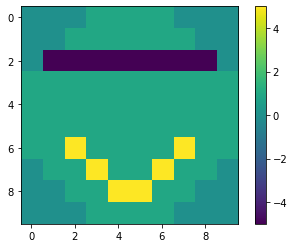

In [104]:
smile[smile > 8] = -5

plt.imshow(smile)
plt.colorbar()
plt.show()

#### Comparación con elementos reales

In [49]:
a = np.arange(6).astype(float)
b = np.ones(6)
a, b

(array([ 0.,  1.,  2.,  3.,  4.,  5.]), array([ 1.,  1.,  1.,  1.,  1.,  1.]))

Las funciones `isclose` y `allclose` realizan comparaciones entre arrays especificando una tolerancia:

In [50]:
np.isclose(a, b, rtol=1e-6)

array([False,  True, False, False, False, False], dtype=bool)

In [51]:
np.allclose(a, b, rtol=1e-6)

False

<div class="alert alert-error">**¡Importante!** Ni en Python ni en ningún otro lenguaje debemos hacer comparaciones exactas entre números de punto flotante. Las operaciones matemáticas con estos números producen casi siempre resultados poco intuitivos y hay que tener cuidado con ellas. Para una introducción a estas peculiaridades existe la web http://puntoflotante.org/. </div>

In [52]:
0.1 + 0.2 + 0.3

0.6000000000000001

In [53]:
0.3 + 0.2 + 0.1

0.6

In [54]:
0.1 + 0.2 + 0.3 == 0.3 + 0.2 + 0.1

False

### Operaciones elemento a elemento

Ahora que pocas cosas se nos escapan de los arrays, probemos a hacer algunas operaciones. El funcionamiento es el habitual en FORTRAN y MATLAB y poco hay que añadir:

In [105]:
#crear un array y sumarle un número
arr = np.arange(11)
arr + 55

array([55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65])

In [106]:
#multiplicarlo por un número
arr * 2

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

In [107]:
#elevarlo al cuadrado
arr ** 2

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100], dtype=int32)

In [108]:
#calcular una función
np.sin(arr)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849,
       -0.54402111])

<div class="alert alert-info"><strong>Entrenamiento:</strong> 
Puedes tratar de comparar la diferencia de tiempo entre realizar la operación en bloque, como ahora, y realizarla elemento a elemento, recorriendo el array con un bucle.
</div>

__Si las operaciones involucran dos arrays también se realizan elemento a elemento__

In [110]:
#creamos dos arrays
arr1 = np.arange(0, 11)
arr2 = np.arange(20, 31)

In [111]:
#los sumamos
arr1 + arr2

array([20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40])

In [112]:
#multiplicamos
arr1 * arr2

array([  0,  21,  44,  69,  96, 125, 156, 189, 224, 261, 300])

#### Comparaciones

In [113]:
# >,<
arr1 > arr2

array([False, False, False, False, False, False, False, False, False,
       False, False])

In [114]:
# ==
arr1 == arr2 # ¡ojo! los arrays son de integers, no de floats

array([False, False, False, False, False, False, False, False, False,
       False, False])

# Ejercicios

### Ejercicio 1.

1. Crear un array `z1` 3x4 lleno de ceros de tipo entero.
2. Crear un array `z2` 3x4 lleno de ceros salvo la primera fila que serán todo unos.
3. Crear un array `z3` 3x4 lleno de ceros salvo la última fila que será el rango entre 5 y 8.

In [116]:
z1 = np.zeros((3,4))
z1

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [117]:
z1[0, :] = 1


array([[1., 1., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [118]:
z3 = np.zeros((3,4))
z3[-1] = np.arange(5,9)
z3

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [5., 6., 7., 8.]])

### Ejercicio 2.

1. Crea un vector de 10 elementos, siendo los impares unos y los pares doses.
2. Crea un «tablero de ajedrez», con unos en las casillas negras y ceros en las blancas.

In [120]:
v = np.ones(10)
v

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [122]:
v[::2] = 2
v

array([2., 1., 2., 1., 2., 1., 2., 1., 2., 1.])

In [124]:
tablero = np.zeros((8, 8))
tablero
tablero[1::2, ::2] = 1
tablero[::2, 1::2] = 1
tablero

array([[0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.]])

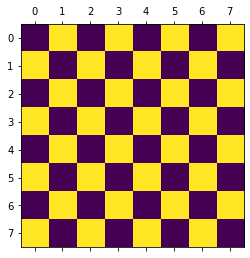

In [125]:
plt.matshow(tablero)

### Ejercicio 3.

1. Crea una matriz aleatoria 5x5 y halla los valores mínimo y máximo.


## Bibliografía

* Documentación de NumPy http://docs.scipy.org/doc/numpy
* Travis Oliphant, "Guide to NumPy" http://csc.ucdavis.edu/~chaos/courses/nlp/Software/NumPyBook.pdf
* SciPy Lecture Notes http://scipy-lectures.github.io
* Nicolas Rougier, "100 NumPy exercises" http://www.loria.fr/~rougier/teaching/numpy.100/index.html